In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Read Bitcoin data
bitcoin_data = pd.read_csv("/content/BTC-USD.csv")
bitcoin_data['Date'] = pd.to_datetime(bitcoin_data['Date'])
bitcoin_data.set_index('Date', inplace=True)
bitcoin_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [ ]:
# Read S&P 500 data
sp500_data = pd.read_csv("/content/SPX.csv")
sp500_data['Date'] = pd.to_datetime(sp500_data['Date'])
sp500_data.set_index('Date', inplace=True)
sp500_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,1999.300049,2010.739990,1993.290039,2001.569946,2001.569946,3209420000
2014-09-18,2003.069946,2012.339966,2003.069946,2011.359985,2011.359985,3235340000
2014-09-19,2012.739990,2019.260010,2006.589966,2010.400024,2010.400024,4880220000
2014-09-22,2009.079956,2009.079956,1991.010010,1994.290039,1994.290039,3349670000
2014-09-23,1992.780029,1995.410034,1982.770020,1982.770020,1982.770020,3279350000


In [ ]:
# Merge both datasets by date
merged_data = pd.merge(bitcoin_data['Close'], sp500_data['Close'], left_index=True, right_index=True, suffixes=('_Bitcoin', '_SP500'))

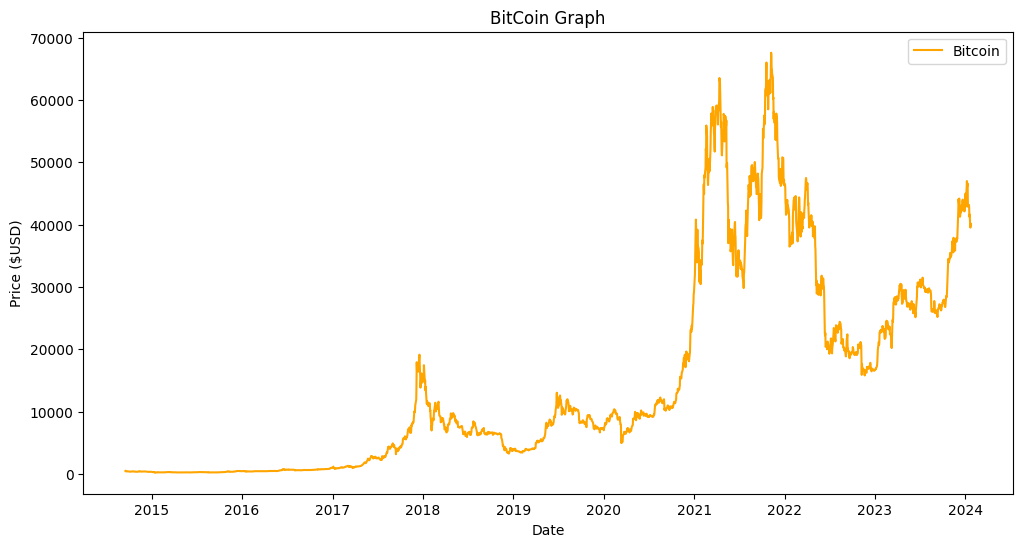

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(merged_data.index, merged_data['Close_Bitcoin'], label='Bitcoin', color='orange')
plt.title('BitCoin Graph')
plt.xlabel('Date')
plt.ylabel('Price ($USD)')
plt.legend()
plt.show()

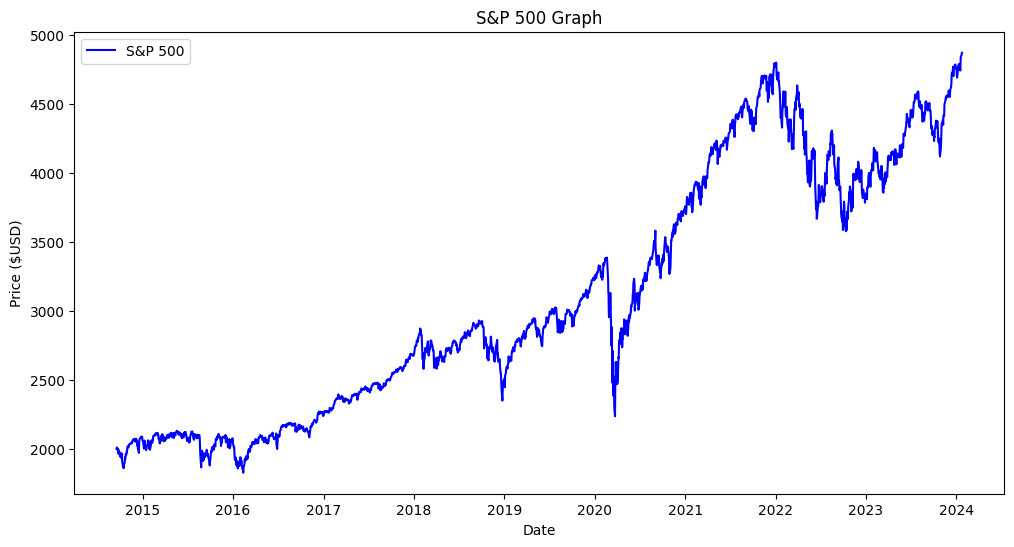

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(merged_data.index, merged_data['Close_SP500'], label='S&P 500', color='blue')
plt.title('S&P 500 Graph')
plt.xlabel('Date')
plt.ylabel('Price ($USD)')
plt.legend()
plt.show()

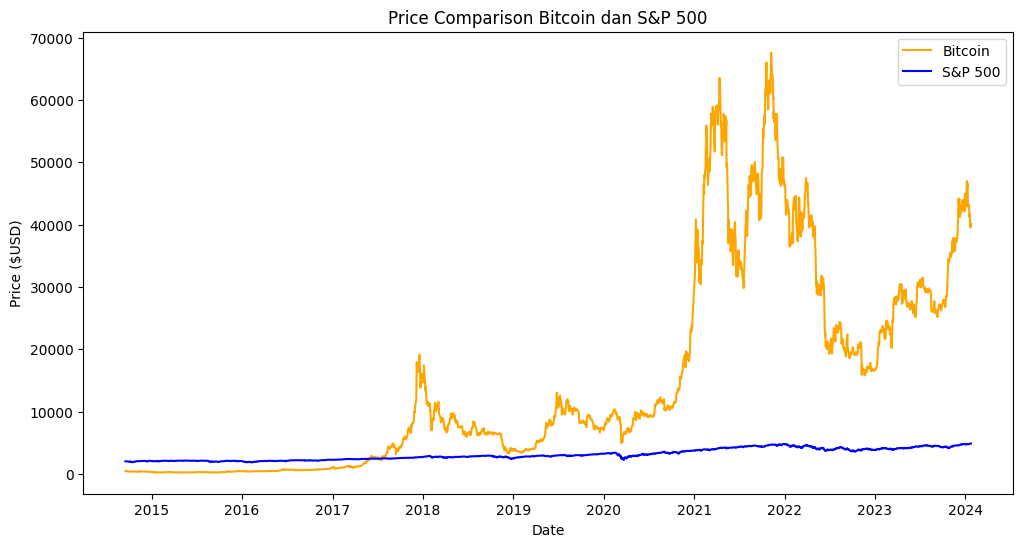

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(merged_data.index, merged_data['Close_Bitcoin'], label='Bitcoin', color='orange')
plt.plot(merged_data.index, merged_data['Close_SP500'], label='S&P 500', color='blue')
plt.title('Price Comparison Bitcoin dan S&P 500')
plt.xlabel('Date')
plt.ylabel('Price ($USD)')
plt.legend()
plt.show()

In [ ]:
correlation = merged_data['Close_Bitcoin'].corr(merged_data['Close_SP500'])
print(f"Correlation between Bitcoin and S&P 500: {correlation}")

Correlation between Bitcoin and S&P 500: 0.9006110903611818


In [ ]:
merged_data['Daily_Return_Bitcoin'] = merged_data['Close_Bitcoin'].pct_change()
merged_data['Daily_Return_SP500'] = merged_data['Close_SP500'].pct_change()

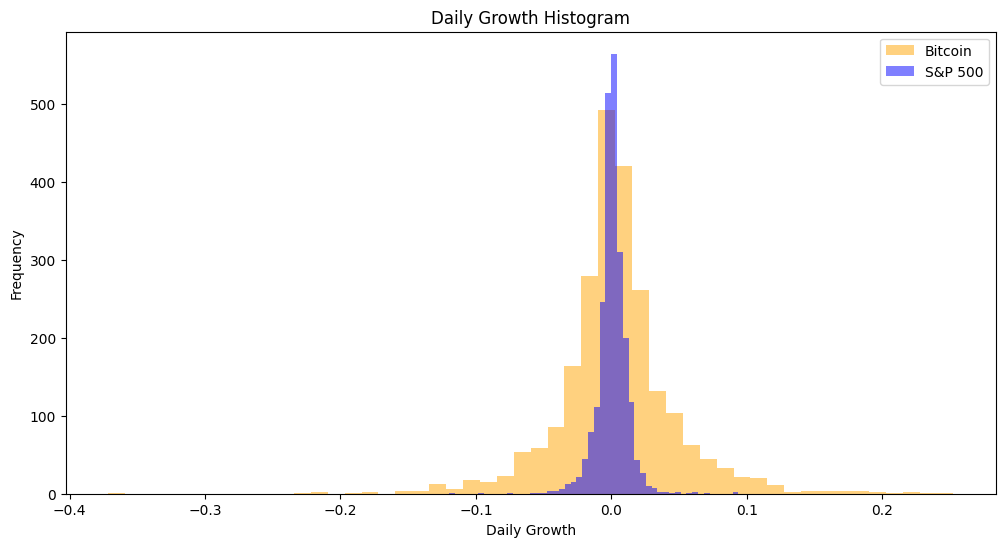

In [ ]:
plt.figure(figsize=(12, 6))
plt.hist(merged_data['Daily_Return_Bitcoin'].dropna(), bins=50, alpha=0.5, label='Bitcoin', color='orange')
plt.hist(merged_data['Daily_Return_SP500'].dropna(), bins=50, alpha=0.5, label='S&P 500', color='blue')
plt.title('Daily Growth Histogram')
plt.xlabel('Daily Growth')
plt.ylabel('Frequency')
plt.legend()
plt.show()


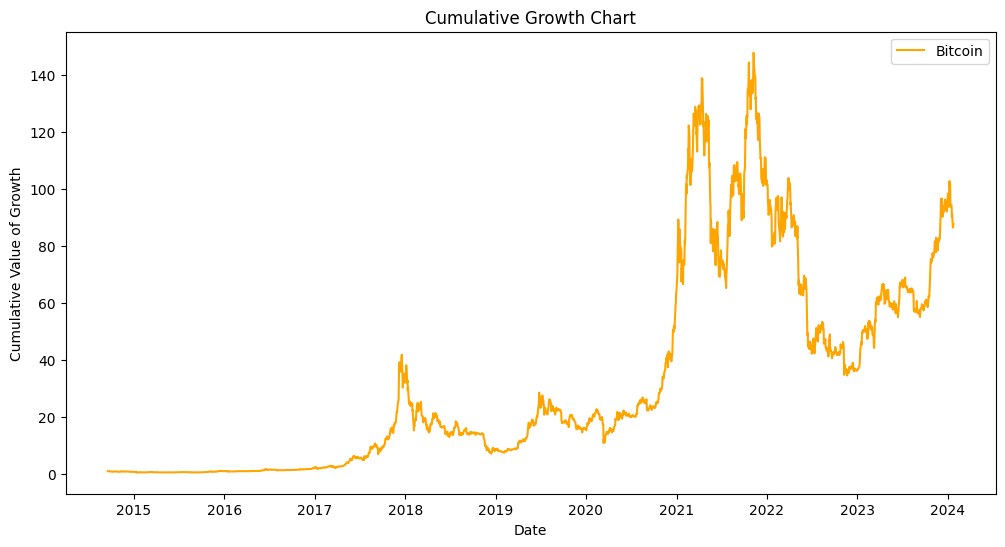

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(merged_data.index, (1 + merged_data['Daily_Return_Bitcoin']).cumprod(), label='Bitcoin', color='orange')
plt.title('Cumulative Growth Chart')
plt.xlabel('Date')
plt.ylabel('Cumulative Value of Growth')
plt.legend()
plt.show()

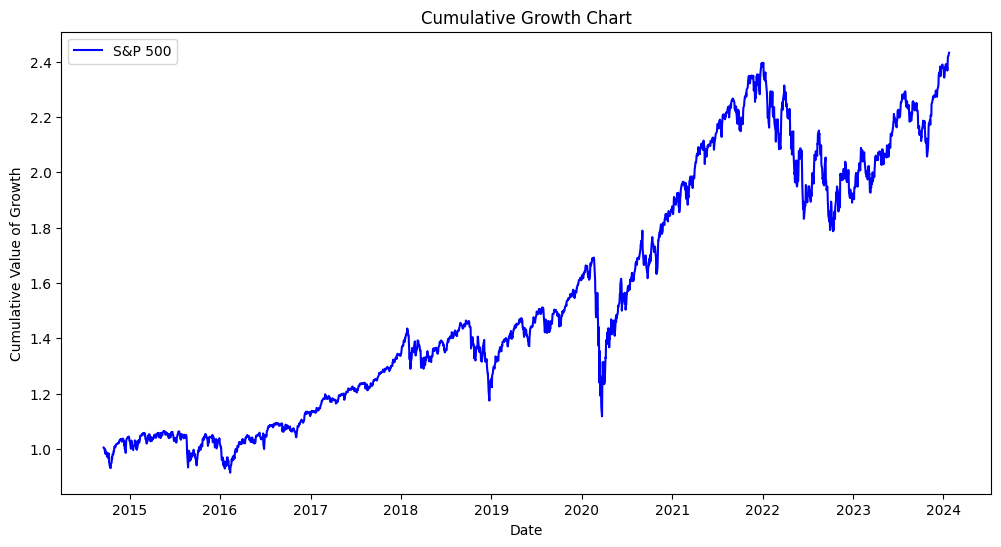

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(merged_data.index, (1 + merged_data['Daily_Return_SP500']).cumprod(), label='S&P 500', color='blue')
plt.title('Cumulative Growth Chart')
plt.xlabel('Date')
plt.ylabel('Cumulative Value of Growth')
plt.legend()
plt.show()

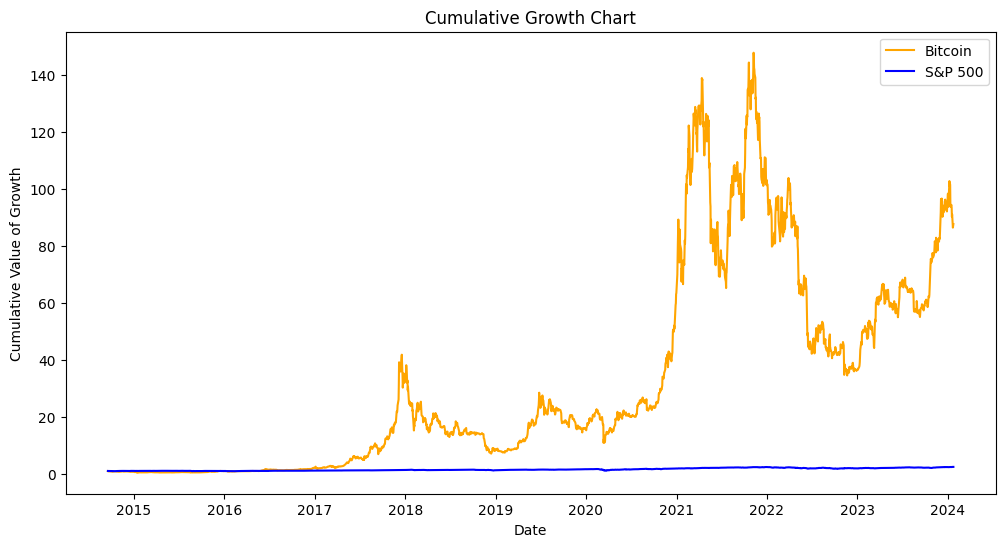

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(merged_data.index, (1 + merged_data['Daily_Return_Bitcoin']).cumprod(), label='Bitcoin', color='orange')
plt.plot(merged_data.index, (1 + merged_data['Daily_Return_SP500']).cumprod(), label='S&P 500', color='blue')
plt.title('Cumulative Growth Chart')
plt.xlabel('Date')
plt.ylabel('Cumulative Value of Growth')
plt.legend()
plt.show()